In [117]:
import numpy as np
import matplotlib.image as img
from PIL import Image
import numpy.fft as fft
import scipy.stats as stats
import matplotlib.pyplot as plt



<img src= 'Practica_3_1.jpg' width="600px">

### 1) Training on FFT in 1D

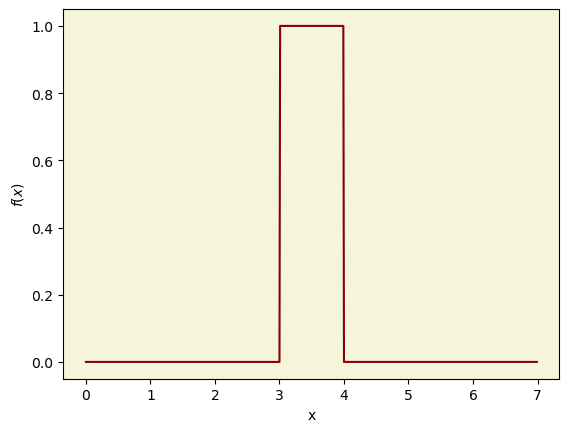

In [2]:
# 1) First, the function is defined by 
def f(x): 
    return 1*((x<4)&(x>3))+0*((x<3)&(x>4))

# the plot is   
x=np.arange(0,7,0.01)

fig, ax  = plt.subplots()

ax.plot(x,f(x), color='darkred')
ax.set_xlabel('x')
ax.set_ylabel('$f(x)$')
ax.set_facecolor('beige')

In [3]:
# now, the Fourier transform of f(x) is
Trans_f =fft.fft(f(x))
# the frecuency is 

k =np.fft.fftfreq(x.shape[-1],0.01)

/tmp/ipykernel_22194/1327129381.py:1: RuntimeWarning: invalid value encountered in true_divide
  f_k = 100*np.sin(k*np.pi)/(k*np.pi)
/home/alfonsozapata/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


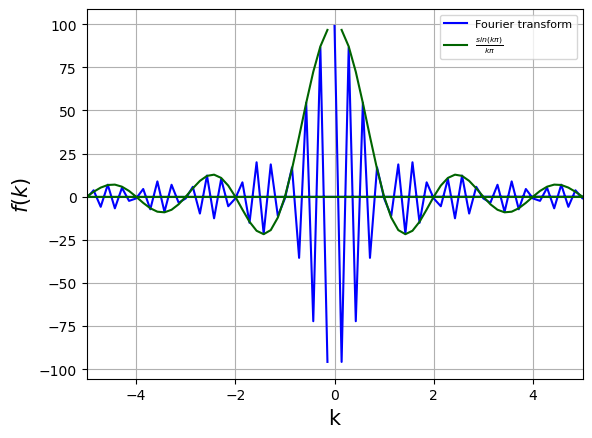

In [4]:

f_k = 100*np.sin(k*np.pi)/(k*np.pi)

# the plot for the Fourier transform is 
plt.plot(k,Trans_f, color='blue',label ='Fourier transform')
plt.plot(k,f_k, color='darkgreen',label ='$\\frac{sin(k \pi )}{k \pi } $')
plt.xlim(-5,5)
plt.legend(fontsize=8)
plt.xlabel('k', size=15)
plt.ylabel('$f(k)$', size=15)
plt.grid()

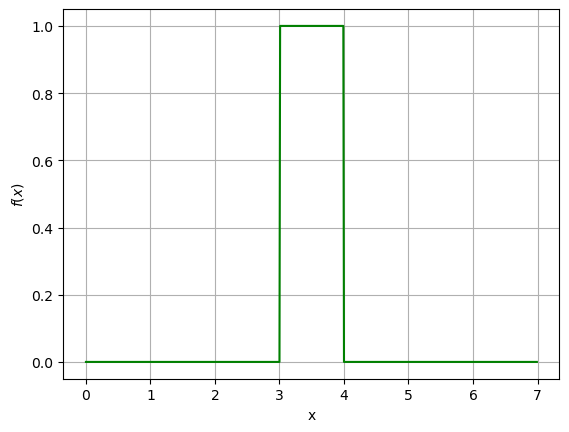

In [5]:
# now we check if the inverse of the Fourier transform
inv_f =fft.ifft(Trans_f)
# and the plot it 
plt.plot(x, inv_f, color='green')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.grid()

<img src= 'Practica_3_2.jpg' width="600px">

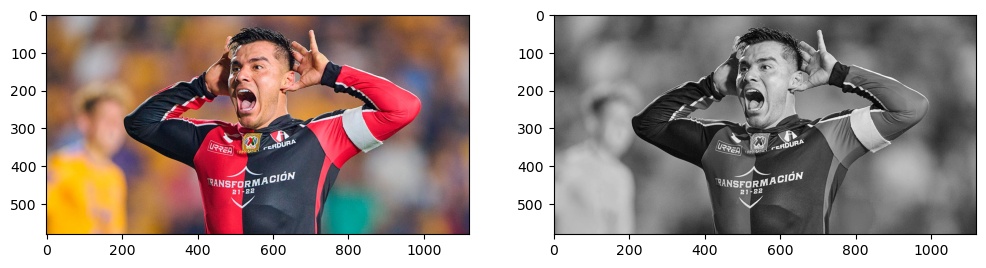

In [31]:

plt.figure(figsize=(12,6))
# the image is
plt.subplot(1, 2, 1)
imagen1 = Image.open('rocha.jpg')
plt.imshow(imagen1)

# and the image to grayscale is
plt.subplot(1, 2, 2)
gray_imagen1 = imagen1.convert('L')
plt.imshow(gray_imagen1, cmap='gray')


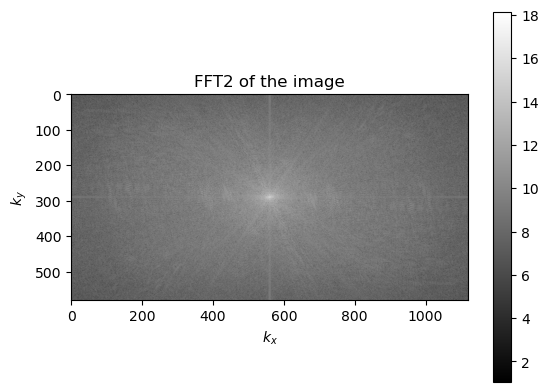

In [55]:
# for work with FFT2, now the array for the image in the grayscale is

imagen1_arr = np.array(gray_imagen1)

# and from the array, calculate the the FFT2 and the 
# the shift of the zero center's frecuency 
fft_r = fft.fft2(imagen1_arr)
fft_shift = fft.fftshift(fft_r)

# and calculate the normalization and using the log scale 
Norm = np.abs(fft_shift)
norm1 = np.log(Norm)  
# finally, we plot it 
plt.imshow(norm1, cmap='gray')
plt.title('FFT2 of the image')
plt.colorbar()
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.show()

In [87]:
# Now we define de value of the  k0, for eliminate modes after 
k_0 = 50
# the mask for k < k0
mask1 = np.zeros_like(Norm)
# and we define de center of the circle using the mask 
mask1_x = mask1.shape[0]
mask1_y = mask1.shape[1]
c_x, c_y = mask1_x // 2, mask1_y // 2

# using a cycle we calculate de distance of the points in the circle 
for i in range(mask1_x):
    for j in range(mask1_y):
        dis= np.sqrt((i -c_x)**2 + (j - c_y)**2)
        if dis <= k_0:
            mask1[i,j] = 1

In [102]:
 # and in the analogous case for k_0 > k0 
mask2 = np.zeros_like(Norm)
# and we define de center of the circle using the mask 
mask2_x = mask2.shape[0]
mask2_y = mask2.shape[1]
c_x2, c_y2 = mask2_x // 2, mask2_y // 2

# using a cycle we calculate de distance of the points in the circle 
for i in range(mask2_x):
    for j in range(mask2_y):
        dis2= np.sqrt((i -c_x)**2 + (j - c_y)**2)
        if dis2 >= k_0:
            mask2[i,j] = 1

In [107]:
# and apply the masks to the fft 
trans1 = fft_shift*mask1
trans2 = fft_shift*mask2


In [108]:
# now we eliminate de modes using the mask1
Norm_fil = Norm*mask1
# we need to calculate the phase for a FFT filtered
phase  = np.angle(fft_shift)
fft_fil = Norm_fil*np.exp(1j*phase)
fft_res = fft.ifftshift(fft_fil) # for the zero frecuency 
#  and the inverse of the transform
imagen_fil = np.abs(fft.ifft2(fft_res))

In [130]:
# and using the mask2
Norm_fil2 = Norm*mask2
phase2  = np.angle(fft_shift)
fft_fil2 = Norm_fil2*np.exp(1j*phase2)
fft_res2 = fft.ifftshift(fft_fil2) # for the zero frecuency 
#  and the inverse of the transform
imagen_fil2 = np.abs(fft.ifft2(fft_res2))

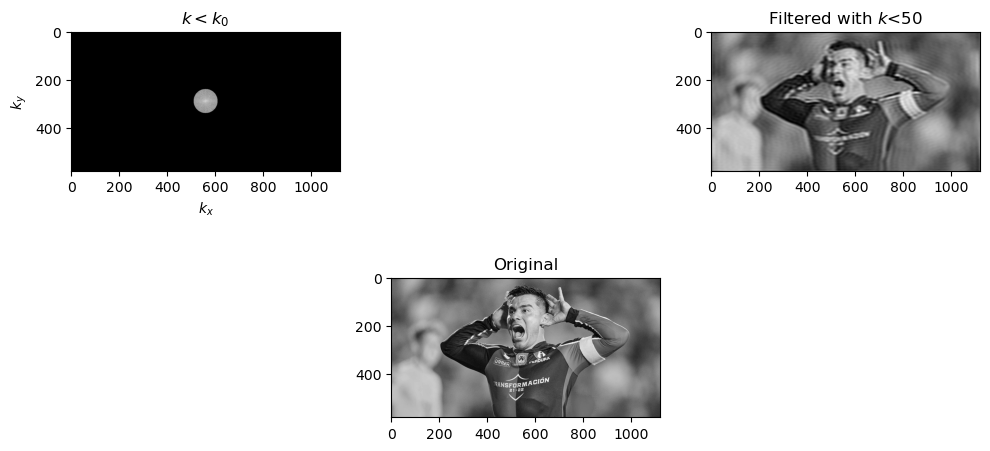

In [134]:
# and plot images using the mask1
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 2)
plt.imshow(imagen1_arr, cmap='gray')
plt.title('Original')
plt.axis()

plt.subplot(2, 3, 3)
plt.imshow(imagen_fil, cmap='gray')
plt.title(f'Filtered with $ k$<{k_0}')
plt.axis()

plt.subplot(2, 3, 1)
plt.imshow(np.log(1+np.abs(trans1)),cmap="gray")
plt.title('$k < k_0$')
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.axis()

plt.tight_layout()
plt.show()

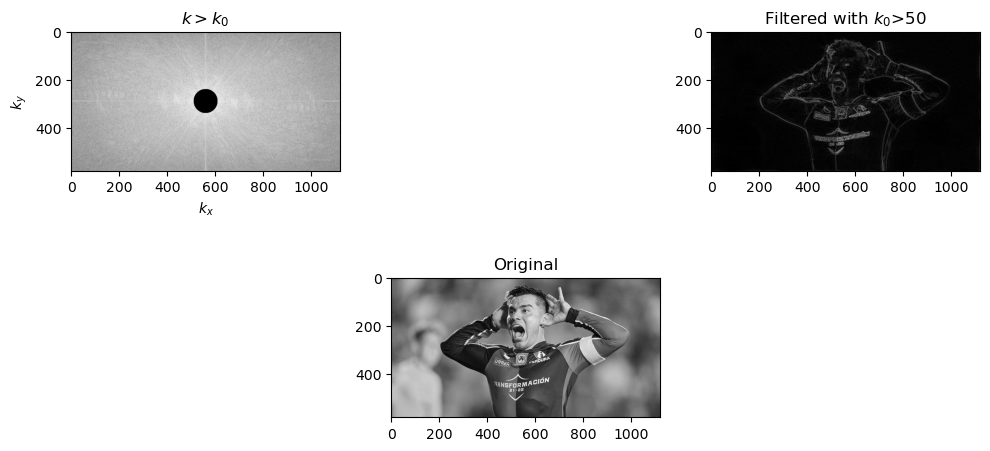

In [140]:
# and using the mask2
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 2)
plt.imshow(imagen1_arr, cmap='gray')
plt.title('Original')
plt.axis()

plt.subplot(2, 3, 3)
plt.imshow(imagen_fil2, cmap='gray')
plt.title(f'Filtered with $ k_0$>{k_0}')
plt.axis()

plt.subplot(2, 3, 1)
plt.imshow(np.log(1+np.abs(trans2)),cmap="gray")
plt.title('$k > k_0$')
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.axis()
plt.tight_layout()

<img src= 'Practica_3_3.jpg' width="600px">

In [49]:
# first, read de document 
dat=np.loadtxt('Halo_list_NO_FOFR_1000.txt')
x = dat[:, 0]
y = dat[:, 1]
z = dat[:, 2]
m = dat[:, 3]
# and determine the minimum and maximum 
min_x, max_x = np.min(x), np.max(x)
min_y, max_y = np.min(y), np.max(y)
min_z, max_z = np.min(z), np.max(z)
box_size_x = max_x - min_x
box_size_y = max_y - min_y
box_size_z = max_z - min_z
print('the size of x coordinate is', box_size_x) 
print('the size of y coordinate is', box_size_y)
print('the size of z coordinate is', box_size_z)  

the size of x coordinate is 999.9323390000001
the size of y coordinate is 999.914376
the size of z coordinate is 999.92216


Text(0, 0.5, 'z')

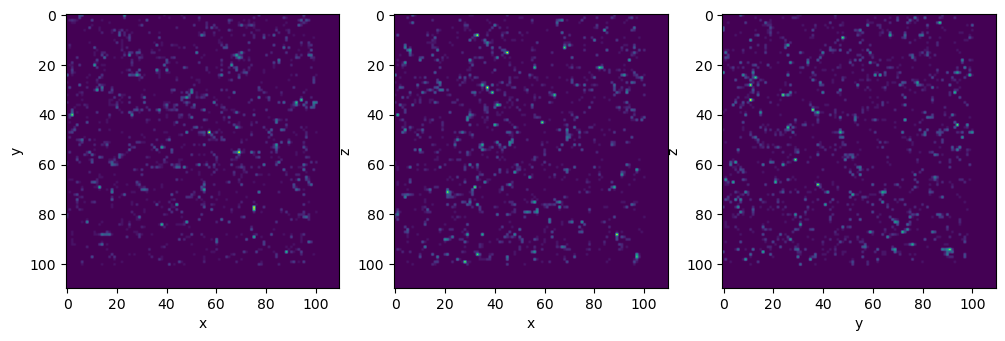

In [55]:
dat_n = dat/10
num_dat = dat_n.shape[0]

p=np.zeros((110,110,110))
for t in range(num_dat):
    i,j,k=np.round(dat_n[t,:3])
    p[int(i),int(j),int(k)]+=1

plt.figure(figsize=(12, 6))

plt.subplot(1,3,1)
plt.imshow(p[:,:,0])
plt.xlabel('x')
plt.ylabel('y')



plt.subplot(1,3,2)
plt.imshow(p[:,0,:])
plt.xlabel('x')
plt.ylabel('z')


plt.subplot(1,3,3)
plt.imshow(p[0,:,:])
plt.xlabel('y')
plt.ylabel('z')





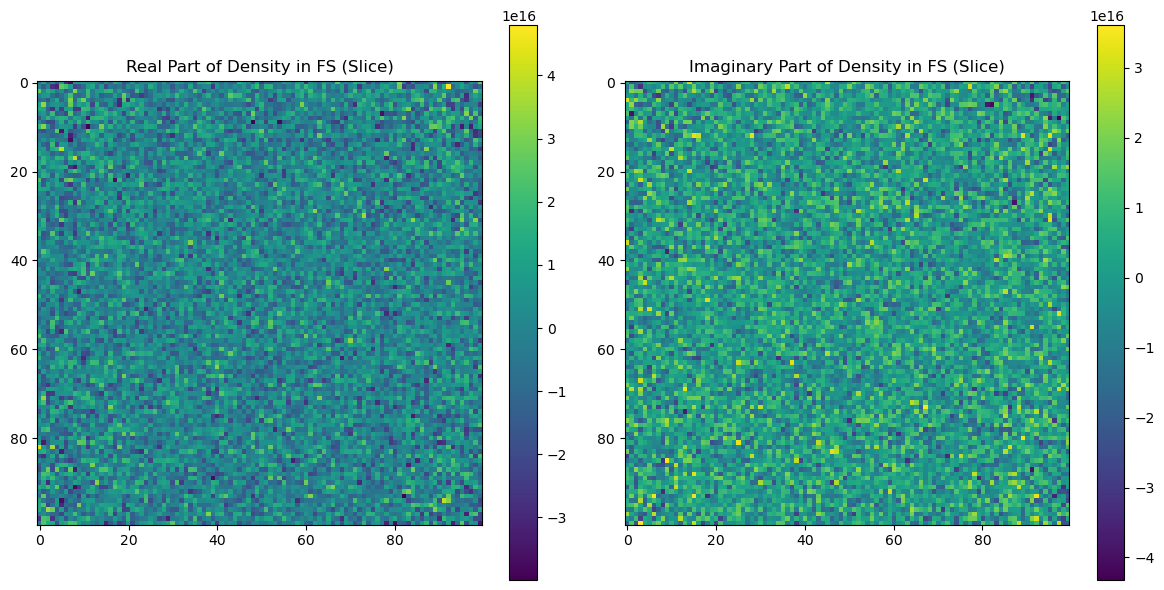

In [77]:
# Define the grid size
grid_size = 10

# Calculate the density grid dimensions
grid_dim_x = int(np.ceil(box_size_x / grid_size))
grid_dim_y = int(np.ceil(box_size_y / grid_size))
grid_dim_z = int(np.ceil(box_size_z / grid_size))

# Initialize the density grid
density_grid = np.zeros((grid_dim_x, grid_dim_y, grid_dim_z))

# Map particles to grid cells using the NGP scheme
for i in range(len(x)):
    grid_x = int((x[i] - min_x) / grid_size)
    grid_y = int((y[i] - min_y) / grid_size)
    grid_z = int((z[i] - min_z) / grid_size)
    
    # Add mass to the corresponding grid cell
    density_grid[grid_x, grid_y,grid_z] += m[i]

# Now, density_grid contains the estimated density using the NGP scheme


# Calculate the Fourier Transform
density_fft = np.fft.fftn(density_grid)

# Choose the slice(s) you want to display
slice_x = density_fft.shape[0] // 10  # Choose the central slice or adjust as needed
slice_y = density_fft.shape[1]
slice_z = density_fft.shape[2] 

# Plot the real part of the density in Fourier Space
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.real(density_fft[slice_x, :, :]), cmap='viridis')
plt.title('Real Part of Density in FS (Slice)')
plt.colorbar()

# Plot the imaginary part of the density in Fourier Space
plt.subplot(1, 2, 2)
plt.imshow(np.imag(density_fft[slice_x, :, :]), cmap='viridis')
plt.title('Imaginary Part of Density in FS (Slice)')
plt.colorbar()

plt.tight_layout()
plt.show()


## using the formula for $k_{max}$ and $k_{min}$ from the slides
$$
k_{min} = \frac{2 \pi N}{2L}
$$
$$
k_{min} > \frac{2 \pi }{ L}
$$

In [69]:
# with $l = 1000$ and $N=100$ the k max is 

k_max = (np.pi*100)/(1000) 
k_min =  np.pi/500 
print('the k_max value is', k_max)
print('the k_min value is', k_min)

the k_max value is 0.3141592653589793
the k_min value is 0.006283185307179587


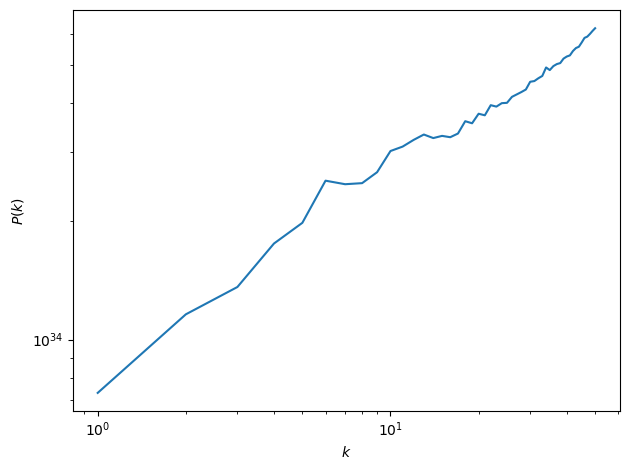

In [153]:
# Calculate the Fourier Transform of the density field
density_fft = np.fft.fftn(density_grid)
fourier_amplitude = np.abs(density_fft)**2

# Determine the size of the grid
npix = density_grid.shape[0]

# Calculate k frequencies
k_freq = np.fft.fftfreq(npix) * npix
kfreq3D = np.meshgrid(k_freq,k_freq,k_freq)
knrm = np.sqrt(kfreq3D[0]**2 + kfreq3D[1]**2 + kfreq3D[2]**2)
knrm = knrm.flatten()

# Flatten the Fourier amplitude array
fourier_amplitudes = fourier_amplitude.flatten()

# Define the bin edges for the histogram
kbins = np.arange(0.5, npix //2+1, 1.0)

# Calculate the average Fourier amplitude within each bin
Abins, _, _ = stats.binned_statistic(knrm,fourier_amplitudes, statistic="mean", bins=kbins)
Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

plt.loglog(kvals, Abins)
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.tight_layout()
plt.savefig("cloud_power_spectrum.png", dpi = 300, bbox_inches = "tight")


In [150]:
fourier_amplitudes.shape

(1000000,)